In [28]:
import json

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.style.use('seaborn-white')  # 'seaborn-ticks'
sns.set_style('white')
import dateutil

In [5]:
animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

# Use data that was sent to collaborators 
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')
data_cols = data.filter(regex='FBG|RBG').columns
fbg_cols = data.filter(regex='FBG').columns
rbg_cols = data.filter(regex='RBG').columns
pval_cols = data.filter(regex='pval').columns

n = data.filter(regex='1091|1093')                 # normal
i = data.filter(regex='1060|1062|1074|1092|1102')  # impaired
d = data.filter(regex='1076|1082|1101')            # diabetic

f = data[fbg_cols]  # fasted
r = data[rbg_cols]  # random-fed

fn = n.filter(fbg_cols)  # fasted normal 
fi = i.filter(fbg_cols)  # fasted impaired
fd = d.filter(fbg_cols)  # fasted diabetic

rn = n.filter(rbg_cols)  # random normal
ri = i.filter(rbg_cols)  # random impaired
rd = d.filter(rbg_cols)  # random diabetic

order_cols = rn.columns.to_list() + fn.columns.to_list() + \
                ri.columns.to_list() + fi.columns.to_list() + \
                rd.columns.to_list() + fd.columns.to_list()

qval_sampling = data['fdr corrected pval effect of sampling']
qval_gtol = data['fdr corrected pval effect of glucose tolerance']
qval_cross = data['fdr corrected pval effect of interaction sampling and glucose tolerance']

In [89]:
# lm_pal = sns.color_palette('Set2', n_colors=2)
# # lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})
# display(lm_pal)

# display(sns.color_palette('colorblind', 15))
# blindcolor = sns.color_palette('colorblind', 15)
# rbg_color = blindcolor[0]
# fbg_color = blindcolor[1]
# normal_color = blindcolor[2]
# impaired_color = blindcolor[7]
# diabetic_color = blindcolor[4]

# with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'r') as infile:
#     class_colormap = json.load(infile)

# lm_class = data[['Compound Class']]
# lm_class.loc[:, 'd'] = lm_class['Compound Class'].map(class_colormap)
# lm_class.loc[:, 'color'] = lm_class['d'].str[0]
# lm_class.loc[:, 'superclass'] = lm_class['d'].str[1]
# lm_class.drop(['d', 'Compound Class'], inplace=True, axis=1)
# data = data.join(lm_class)
# data[['color', 'superclass']]


In [91]:
with open(r'..\data\metadata\color_schemes.json', 'r') as infile:
    color_schemes = json.load(infile)
    
with open(r'..\data\metadata\class_to_superclass_map.json') as infile:
    class_to_superclass_map = json.load(infile)

In [27]:
k = data[data['Compound Class'] != 'unknown']
# k.loc[k['Compound Class'] == 'FA']

In [79]:
k.loc[(k['Type'] == 'metabolite') & \
      (~k['superclass'].isin(['Sphingolipid', 'Fatty Acyl'])), 'superclass'].value_counts()

Amino Acid                            30
Amine/Amide/Ammonium/N-heterocycle    17
Other Metabolite                      14
Carboxylic Acid                       13
Name: superclass, dtype: int64

In [88]:
fg

,File Name_lipid,lipid_run_order,fr_name,animal,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance,bg,File Name_metab,metab_run_order,fixed_filename,qc_file,blank_file,gluc_tol,combined_col_name
0,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,7,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,1076,FBG,True,10,27,2021-04-05,diabetic,71.000000,20210831_KAO_HILIC_T1076M_20210405_10wk_FBG,21,20210831_KAO_HILIC_T1076M_20210405_10wk_FBG,False,False,diabetic,1076_10_FBG
1,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,8,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,1062,FBG,True,8,9,2021-03-22,impaired,52.333333,20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,61,20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,False,False,impaired,1062_8_FBG
2,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,9,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,1093,FBG,True,9,49,2021-04-02,normal,64.000000,20210831_KAO_HILIC_T1093M_20210402_9wk_FBG,50,20210831_KAO_HILIC_T1093M_20210402_9wk_FBG,False,False,normal,1093_9_FBG
3,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,10,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,1060,RBG,True,8,4,2021-03-25,impaired,225.000000,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,59,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,False,False,impaired,1060_8_RBG
4,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,11,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,1091,FBG,True,10,39,2021-04-10,normal,48.500000,20210831_KAO_HILIC_T1091M_20210410_10wk_FBG,56,20210831_KAO_HILIC_T1091M_20210410_10wk_FBG,False,False,normal,1091_10_FBG
5,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,12,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,1092,RBG,True,9,44,2021-04-06,impaired,70.500000,20210831_KAO_HILIC_T1092M_20210406_9wk_RBG,18,20210831_KAO_HILIC_T1092M_20210406_9wk_RBG,False,False,impaired,1092_9_RBG
6,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,13,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,1093,RBG,True,10,52,2021-04-13,normal,69.500000,20210831_KAO_HILIC_T1093M_20210413_10wk_RBG,45,20210831_KAO_HILIC_T1093M_20210413_10wk_RBG,False,False,normal,1093_10_RBG
7,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,14,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,1082,FBG,True,10,33,2021-04-05,diabetic,50.000000,20210831_KAO_HILIC_T1082M_20210405_10wk_FBG,41,20210831_KAO_HILIC_T1082M_20210405_10wk_FBG,False,False,diabetic,1082_10_FBG
8,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,15,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,1060,RBG,True,9,6,2021-04-01,impaired,83.000000,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,False,impaired,1060_9_RBG
9,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,16,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,1101,FBG,True,9,55,2021-04-02,diabetic,43.000000,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,44,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,False,False,diabetic,1101_9_FBG


In [86]:
class_colormap

{'TG': [[0.5803921568627451, 0.403921568627451, 0.7411764705882353],
  'Glycerolipid'],
 'Alkenyl-DG': [[0.5803921568627451, 0.403921568627451, 0.7411764705882353],
  'Glycerolipid'],
 'AC': [[0.8392156862745098, 0.15294117647058825, 0.1568627450980392],
  'Fatty Acyl'],
 'FA': [[0.8392156862745098, 0.15294117647058825, 0.1568627450980392],
  'Fatty Acyl'],
 'CE': [[0.12156862745098039, 0.4666666666666667, 0.7058823529411765],
  'Sterol Lipid'],
 'SM': [[1.0, 0.4980392156862745, 0.054901960784313725], 'Sphingolipid'],
 'Cer[NS]': [[1.0, 0.4980392156862745, 0.054901960784313725], 'Sphingolipid'],
 'LysoPE': [[0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
  'Phospholipid'],
 'LysoPC': [[0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
  'Phospholipid'],
 'PC': [[0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
  'Phospholipid'],
 'PI': [[0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
  'Phospholipid'],
 'Plasmenyl-PC': [[0.1725

In [80]:
# lsc = Lipid SuperClass

lsc_counts = k.loc[(k['Type'] == 'lipid') | (k['Compound Class'] == 'FA'), 'superclass'].value_counts()
lsc_names = lsc_counts.index
print(lsc_names)
print(lsc_counts)

msc_counts = k.loc[(k['Type'] == 'metabolite') & \
                   (~k['superclass'].isin(['Sphingolipid', 'Fatty Acyl'])), 'superclass'].value_counts()
msc_names = msc_counts.index
print(msc_counts, msc_names)

l_colors = 

Index(['Phospholipid', 'Glycerolipid', 'Sphingolipid', 'Fatty Acyl',
       'Sterol Lipid'],
      dtype='object')
Phospholipid    163
Glycerolipid    107
Sphingolipid     30
Fatty Acyl       18
Sterol Lipid      4
Name: superclass, dtype: int64
Amino Acid                            30
Amine/Amide/Ammonium/N-heterocycle    17
Other Metabolite                      14
Carboxylic Acid                       13
Name: superclass, dtype: int64 Index(['Amino Acid', 'Amine/Amide/Ammonium/N-heterocycle', 'Other Metabolite',
       'Carboxylic Acid'],
      dtype='object')


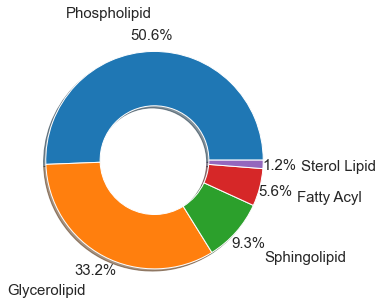

In [92]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = lsc_names
sizes = lsc_counts.to_list()
explode = (0, 0, 0, 0, 0) 

fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=labels, 
       explode=explode, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=0,
       wedgeprops={'width': 0.5},
       textprops={'fontsize': 15}, 
       labeldistance=1.35,
       pctdistance=1.15)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.set_size_inches((5,5))

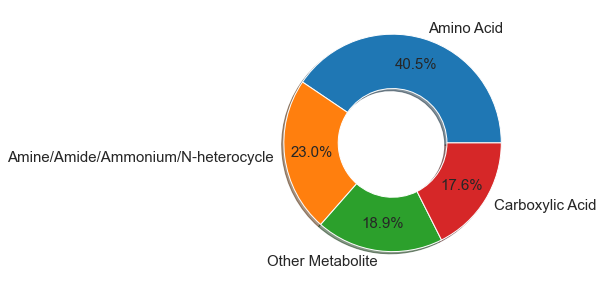

In [93]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = msc_names
sizes = msc_counts.to_list()
# explode = (0, 0, 0, 0, 0) 

fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=labels, 
#        explode=explode, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=0,
       wedgeprops={'width': 0.5},
       textprops={'fontsize': 15}, 
       labeldistance=1.1,
       pctdistance=0.75)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.set_size_inches((5,5))